In [60]:
import pandas as pd

In [61]:
dataset=pd.read_csv("50_Startups.csv")

In [62]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [63]:
independent=dataset[['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida', 'State_New York']]

In [64]:
dependent=dataset[['Profit']]

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [168]:
#we have to check one by parameter which one give more accuracy

from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='friedman_mse',max_features='auto',splitter='best')
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort=False,
                      random_state=None, splitter='best')

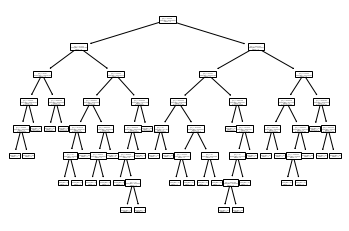

In [169]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [170]:
y_pred=regressor.predict(x_test)

In [171]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [172]:
r_score

0.9373868660381883

In [173]:
import pickle                                    #used to save model
filename="finalized_model_Mult_linear.sav"  
pickle.dump(regressor,open(filename,'wb'))

In [164]:
# loaded model
model=pickle.load(open(filename,'rb'))

In [165]:
rd_input=float(input("R&D:"))
admin_input=float(input("Admin:"))
mark_input=float(input("Marketing:"))
fol_input=int(input("State_fol 0 or 1:"))
new_input=int(input("State_new 0 or 1:"))

R&D:2000
Admin:1000
Marketing:453
State_fol 0 or 1:0
State_new 0 or 1:0


In [166]:
result=model.predict([[rd_input,admin_input,mark_input,fol_input,new_input]])

In [167]:
result

array([49490.75])